Lab09 - XOR. Logistic Regression - Eager Execution
 * XOR문제를 Logistic Regression을 통해 풀어보도록 하겠습니다.

# 기본 Library 선언 및 Tensorflow 버전 확인

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)
tf.__version__

'2.3.1'

# 강의 Data
 * x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data를 0과 1로 구분하는 예제입니다.
 * 붉은색과 푸른색으로 0과 1을 표시해보도록 하겠습니다.

Text(0, 0.5, 'x2')

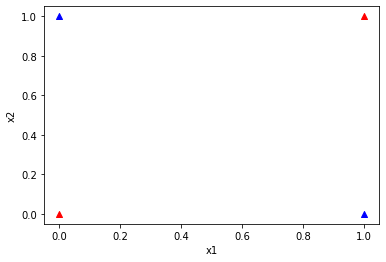

In [20]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1],c='red',marker='^')
plt.scatter(x_data[3][0],x_data[3][1],c='red',marker='^')
plt.scatter(x_data[1][0],x_data[1][1],c='blue',marker='^')
plt.scatter(x_data[2][0],x_data[2][1],c='blue',marker='^')

plt.xlabel('x1')
plt.ylabel('x2')

# Tensorflow Eager
 * Tensorflow Data API를 통해 학습시킬 값들을 담는다. (Batch Size는 한번에 학습시킬 Size로 정한다)
 * Preprocess function으로 Features, labels는 실제 학습에 쓰일 Data 연산을 위해 Type을 맞춰준다.

In [21]:
dataset = tf.data.Dataset.from_tensor_slices((x_data,y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features,tf.float32)
    labels = tf.cast(labels,tf.float32)
    return features, labels

1) Logistic Regression으로 XOR모델을 만들어 보겠습니다.

W와 b는 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias(초기값을 Variable = 0이나 Random 값으로 가능.

In [22]:
W = tf.Variable(tf.zeros((2,1)),name='weight')
b = tf.Variable(tf.zeros((1,)),name='bias')
print("W = {}, b = {}".format(W.numpy(),b.numpy()))

W = [[0.]
 [0.]], b = [0.]


Sigmoid 함수를 가설로 선언합니다.
 * Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다.
 * tf.sigmoid(tf.matmul(X,W) + b)와 같습니다.

<img src="https://latex.codecogs.com/gif.latex?sigmoid(x)&space;=&space;\frac{1}{1&plus;e^{-x}}" title="sigmoid(x) = \frac{1}{1+e^{-x}}" />

In [23]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

가설을 검증할 Cost 함수를 정의합니다.

<img src="https://latex.codecogs.com/gif.latex?Cost(h_\theta(x),y)&space;=&space;\begin{Bmatrix}&space;-log(h_\theta(x))\quad&space;if\;y=1&space;\\&space;-log(1-h_\theta(x))\quad&space;if\;y=0&space;\end{Bmatrix}" title="Cost(h_\theta(x),y) = \begin{Bmatrix} -log(h_\theta(x))\quad if\;y=1 \\ -log(1-h_\theta(x))\quad if\;y=0 \end{Bmatrix}" />

 * 위 두 수식을 합치면 아래와 같습니다.
 <img src="https://latex.codecogs.com/gif.latex?Cost(h_\theta(x),y)&space;=&space;-ylog(h_\theta(x))&space;-&space;(1-y)log(1-h_\theta(x))" title="Cost(h_\theta(x),y) = -ylog(h_\theta(x)) - (1-y)log(1-h_\theta(x))" />

In [24]:
def loss_fn(hypothesis,features,labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1-labels) * tf.math.log(1-hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

추론한 값은 0.5를 기준(Sigmoid 그래프 참조)로 0과 1의 값을 리턴합니다.

 * Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0으로 반환합니다.

In [25]:
def accuracy_fn(hypothesis,labels):
    predicted = tf.cast(hypothesis > 0.5,dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,labels),dtype=tf.float32))
    return accuracy

GradientTape를 통해 경사값을 계산합니다.

In [26]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

Tensorflow를 통한 실행을 위해 Session을 선언합니다.

 * 위의 Data를 Cost 함수를 통해 학습시킨 후 모델을 생성합니다.

In [27]:
Epochs = 1001

for step in range(Epochs):
    for features, labels in dataset:
        features, labels = preprocess_data(features,labels)
        grads = grad(logistic_regression(features),features,labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print('iter: {},Loss: {:.4f}'.format(step,loss_fn(logistic_regression(features),features,labels)))
            
print('W = {},B = {}'.format(W.numpy(),b.numpy()))
x_data, y_data = preprocess_data(x_data,y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print('Test Accuracy: {:.4f}'.format(test_acc))

iter: 0,Loss: 0.6931
iter: 100,Loss: 0.6931
iter: 200,Loss: 0.6931
iter: 300,Loss: 0.6931
iter: 400,Loss: 0.6931
iter: 500,Loss: 0.6931
iter: 600,Loss: 0.6931
iter: 700,Loss: 0.6931
iter: 800,Loss: 0.6931
iter: 900,Loss: 0.6931
iter: 1000,Loss: 0.6931
W = [[0.]
 [0.]],B = [0.]
Test Accuracy: 0.5000
